In [91]:
import pandas as pd

In [92]:
dados = pd.read_csv("marketing_investimento.csv")
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [93]:
import plotly.express as px

In [94]:
px.histogram(dados, x="aderencia_investimento", text_auto=True)

In [95]:
px.histogram(
    dados,
    x="estado_civil",
    text_auto=True,
    color="aderencia_investimento",
    barmode="group",
)

In [96]:
px.histogram(
    dados,
    x="fez_emprestimo",
    text_auto=True,
    color="aderencia_investimento",
    barmode="group",
)

In [97]:
px.histogram(
    dados,
    x="inadimplencia",
    text_auto=True,
    color="aderencia_investimento",
    barmode="group",
)

In [98]:
px.histogram(
    dados,
    x="escolaridade",
    text_auto=True,
    color="aderencia_investimento",
    barmode="group",
)

In [99]:
px.box(dados, x="idade", color="aderencia_investimento")

In [100]:
px.box(dados, x="saldo", color="aderencia_investimento")

In [101]:
px.box(dados, x="tempo_ult_contato", color="aderencia_investimento")

In [102]:
x = dados.drop("aderencia_investimento", axis=1)
y = dados["aderencia_investimento"]

In [103]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [104]:
colunas = x.columns

In [105]:
one_hot_encode = make_column_transformer(
    (
        OneHotEncoder(drop="if_binary"),
        ["estado_civil", "escolaridade", "inadimplencia", "fez_emprestimo"],
    ),
    remainder="passthrough",
    sparse_threshold=0,
)

In [106]:
x = one_hot_encode.fit_transform(x)

In [107]:
one_hot_encode.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [108]:
pd.DataFrame(x, columns=one_hot_encode.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)

In [113]:
from sklearn.dummy import DummyClassifier

In [114]:
dummy_classifier = DummyClassifier()

dummy_classifier.fit(x_treino, y_treino)

dummy_classifier.score(x_teste, y_teste)

0.6025236593059937

In [115]:
from sklearn.tree import DecisionTreeClassifier

decision_classifier = DecisionTreeClassifier(random_state=5)

decision_classifier.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [116]:
decision_classifier.score(x_teste, y_teste)

0.6656151419558359

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [118]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


In [120]:
decision_classifier.score(x_treino, y_treino)

1.0

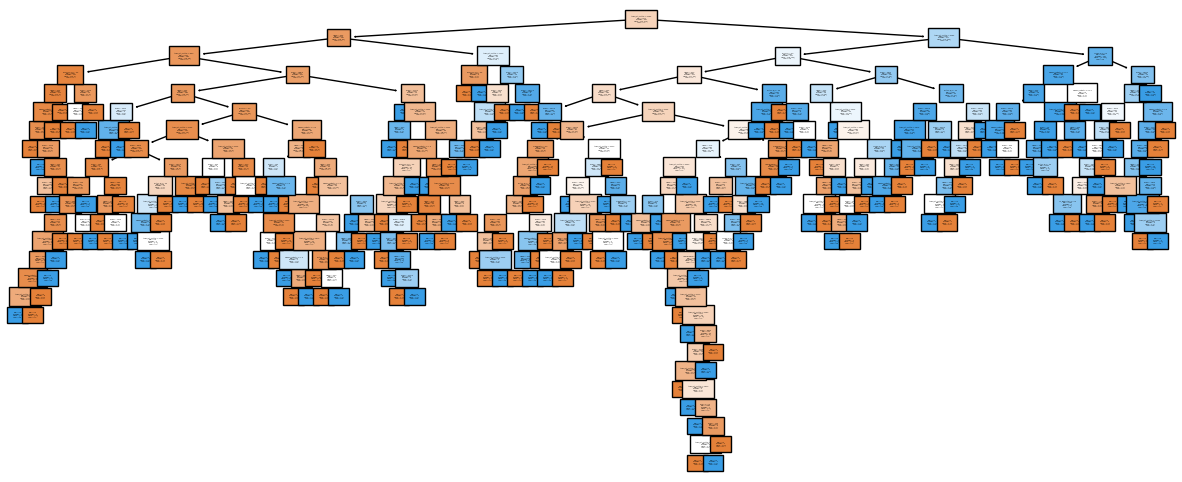

In [129]:
plt.figure(figsize=(15, 6))
plot_tree(decision_classifier, filled=True, class_names=['nao', 'sim'], fontsize=1, feature_names=nome_colunas);

In [132]:
decision_classifier_fix = DecisionTreeClassifier(random_state=5, max_depth=3)

decision_classifier_fix.fit(x_treino, y_treino)

decision_classifier_fix.score(x_treino, y_treino)

0.7613038906414301

In [133]:
decision_classifier_fix.score(x_teste, y_teste)

0.7160883280757098

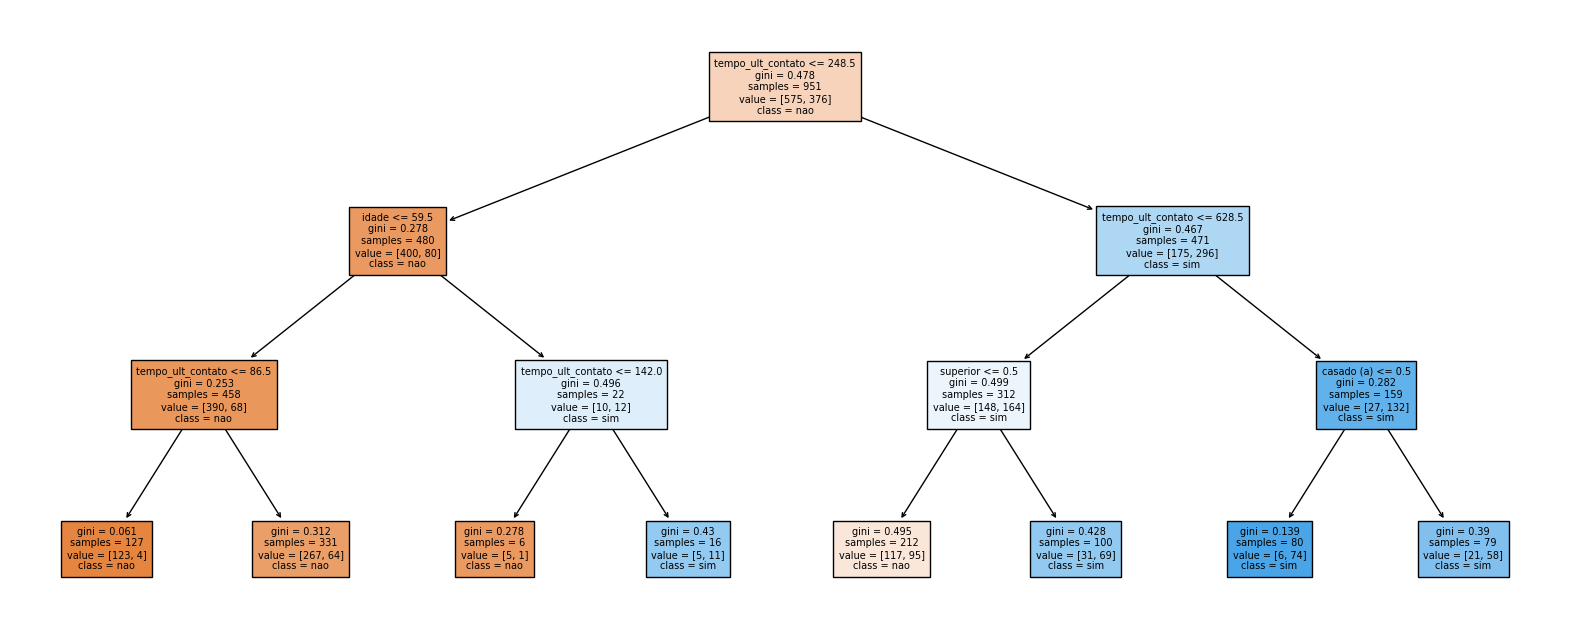

In [135]:
plt.figure(figsize=(20, 8))
plot_tree(decision_classifier_fix, filled=True, class_names=['nao', 'sim'], fontsize=7, feature_names=nome_colunas);

In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

In [144]:
print(f'acurácia dummy {dummy_classifier.score(x_teste, y_teste)}')
print(f'acurácia tree {decision_classifier_fix.score(x_teste, y_teste)}')
print(f'acurácia dummy {knn.score(x_teste_normalizado, y_teste)}')

acurácia dummy 0.6025236593059937
acurácia tree 0.7160883280757098
acurácia dummy 0.6876971608832808


In [146]:
import pickle

In [147]:
with open('modelo_one_hot_encoder.pkl', 'wb') as arquivo:
    pickle.dump(one_hot_encode, arquivo)

In [148]:
with open('modelo_tree.pkl', 'wb') as arquivo:
    pickle.dump(decision_classifier_fix, arquivo)

In [150]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [152]:
dados_novo = pd.DataFrame(novo_dado)
dados_novo

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [157]:
modelo_one_hot = pd.read_pickle('modelo_one_hot_encoder.pkl')
modelo_tree = pd.read_pickle('modelo_tree.pkl')

modelo_tree.predict(modelo_one_hot.transform(dados_novo))


array([1])